In [1]:
# Import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read files into DataFrame
path_conflict = Path("conflict_data.csv")
conflict_df = pd.read_csv(path_conflict)

path_migration = Path("net_migration.csv")
migration_df = pd.read_csv(path_migration)

path_population = Path("population(1).csv")
population_df = pd.read_csv(path_population)

In [3]:
conflict_df.head()
conflict_df.tail()

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
6965,Zimbabwe,ZWE,2018,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0
6969,Zimbabwe,ZWE,2022,0,0,0,0


In [4]:
# Filter population_df and migration_df to include data starting from 1989
population_df = population_df[population_df['Year'] >= 1989]
migration_df = migration_df[migration_df['Year'] >= 1989]


In [5]:
migration_df.head()


,Country name,Year,Net migration
39,Afghanistan,1989,2683.0
40,Afghanistan,1990,-666001.0
41,Afghanistan,1991,39926.0
42,Afghanistan,1992,1834556.0
43,Afghanistan,1993,1171818.0


In [6]:
population_df.head()


,Country name,Year,Population,Population of children under the age of 1,Population of children under the age of 5,Population of children under the age of 15,Population under the age of 25,Population aged 15 to 64 years,Population older than 15 years,Population older than 18 years,...,population__all__50_54__records,population__all__55_59__records,population__all__60_64__records,population__all__65_69__records,population__all__70_74__records,population__all__75_79__records,population__all__80_84__records,population__all__85_89__records,population__all__90_94__records,population__all__95_99__records
39,Afghanistan,1989,10673172,489435.0,2082184,5052384,7126207,5380686,5620784,4905193,...,289662,228355,171398,115617,69936,35661,14036,4043,727,78
40,Afghanistan,1990,10694804,493998.0,2109904,5077301,7160054,5377230,5617499,4900496,...,287069,226736,170537,115698,69915,35740,14068,4038,731,79
41,Afghanistan,1991,10745168,500573.0,2141695,5119305,7213365,5384507,5625858,4907117,...,284851,225840,170016,116184,70182,35931,14188,4049,737,80
42,Afghanistan,1992,12057436,565739.0,2424845,5766046,8113585,6019620,6291385,5488150,...,315794,251764,189390,130639,79050,40502,16088,4559,836,91
43,Afghanistan,1993,14003764,660898.0,2839815,6722018,9442119,6964547,7281741,6354042,...,363533,290544,218463,151998,92391,47427,18947,5341,986,104


In [7]:
selected_columns = population_df[["Country name", "Year", "Population"]]
population_only_df = pd.DataFrame(selected_columns)
population_only_df.head()

,Country name,Year,Population
39,Afghanistan,1989,10673172
40,Afghanistan,1990,10694804
41,Afghanistan,1991,10745168
42,Afghanistan,1992,12057436
43,Afghanistan,1993,14003764


In [8]:
conflict_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              6970 non-null   object
 1   Code                6970 non-null   object
 2   Year                6970 non-null   int64 
 3   One-sided violence  6970 non-null   int64 
 4   Non-state           6970 non-null   int64 
 5   Intrastate          6970 non-null   int64 
 6   Interstate          6970 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 381.3+ KB


In [8]:
population_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                18288 non-null  object 
 1   Year                                        18288 non-null  int64  
 2   Population                                  18288 non-null  int64  
 3   Population of children under the age of 1   18288 non-null  float64
 4   Population of children under the age of 5   18288 non-null  int64  
 5   Population of children under the age of 15  18288 non-null  int64  
 6   Population under the age of 25              18288 non-null  int64  
 7   Population aged 15 to 64 years              18288 non-null  int64  
 8   Population older than 15 years              18288 non-null  int64  
 9   Population older than 18 years              18288 non-null  int64  
 10  Population

In [9]:
migration_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8415 entries, 39 to 18359
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country name   8415 non-null   object 
 1   Year           8415 non-null   int64  
 2   Net migration  8415 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 263.0+ KB


In [10]:
conflict_df.head()


,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate
0,Abkhazia,OWID_ABK,1989,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0


In [11]:
conflict_df["total_conflict_deaths"] = conflict_df[["One-sided violence", "Non-state", "Intrastate", "Interstate"]].sum(axis=1)
conflict_df 

,Entity,Code,Year,One-sided violence,Non-state,Intrastate,Interstate,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0,0,0,0,0
1,Abkhazia,OWID_ABK,1990,0,0,0,0,0
2,Abkhazia,OWID_ABK,1991,0,0,0,0,0
3,Abkhazia,OWID_ABK,1992,0,0,0,0,0
4,Abkhazia,OWID_ABK,1993,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0,0,0,0,0
6966,Zimbabwe,ZWE,2019,0,0,0,0,0
6967,Zimbabwe,ZWE,2020,0,0,0,0,0
6968,Zimbabwe,ZWE,2021,0,0,0,0,0


In [12]:
conflict_df.drop(["One-sided violence", "Non-state", "Intrastate", "Interstate"], axis=1, inplace=True)
conflict_df

,Entity,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0
...,...,...,...,...
6965,Zimbabwe,ZWE,2018,0
6966,Zimbabwe,ZWE,2019,0
6967,Zimbabwe,ZWE,2020,0
6968,Zimbabwe,ZWE,2021,0


In [13]:
# Rename 'Entity' column in conflict_df to 'country name'
conflict_df.rename(columns={'Entity': 'Country name'}, inplace=True)
conflict_df.head()

,Country name,Code,Year,total_conflict_deaths
0,Abkhazia,OWID_ABK,1989,0
1,Abkhazia,OWID_ABK,1990,0
2,Abkhazia,OWID_ABK,1991,0
3,Abkhazia,OWID_ABK,1992,0
4,Abkhazia,OWID_ABK,1993,0


In [14]:
# Remove Code column
conflict_df.drop(["Code"], axis=1, inplace=True)
conflict_df.head()

,Country name,Year,total_conflict_deaths
0,Abkhazia,1989,0
1,Abkhazia,1990,0
2,Abkhazia,1991,0
3,Abkhazia,1992,0
4,Abkhazia,1993,0


In [15]:
# Merge conflict_df and migration_df on 'country_name' and 'year'
merged_df = pd.merge(conflict_df, migration_df, on=['Country name', 'Year'], how='outer')

# Merge the resulting DataFrame with population_df on 'country_name' and 'year'
merged_df = pd.merge(merged_df, population_only_df, on=['Country name', 'Year'], how='outer')

In [16]:
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Abkhazia,1989,0.0,NaN,NaN
1,Abkhazia,1990,0.0,NaN,NaN
2,Abkhazia,1991,0.0,NaN,NaN
3,Abkhazia,1992,0.0,NaN,NaN
4,Abkhazia,1993,0.0,NaN,NaN


In [17]:
# Remove any NaNs from the dataset.
merged_df.dropna(how="any", inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
34,Afghanistan,1989,5411.0,2683.0,10673172.0
35,Afghanistan,1990,1514.0,-666001.0,10694804.0
36,Afghanistan,1991,3553.0,39926.0,10745168.0
37,Afghanistan,1992,4366.0,1834556.0,12057436.0
38,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [18]:
# Reset Index
merged_df.reset_index(drop=True, inplace=True)
merged_df.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [19]:
# Collecting data from a specific country
Afghanistan_data = merged_df[merged_df['Country name'] == 'Afghanistan']
Afghanistan_data.head()

,Country name,Year,total_conflict_deaths,Net migration,Population
0,Afghanistan,1989,5411.0,2683.0,10673172.0
1,Afghanistan,1990,1514.0,-666001.0,10694804.0
2,Afghanistan,1991,3553.0,39926.0,10745168.0
3,Afghanistan,1992,4366.0,1834556.0,12057436.0
4,Afghanistan,1993,4097.0,1171818.0,14003764.0


In [20]:
# List of African countries 
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

# Filter the population DataFrame to include only countries from Africa
african_population_df = population_only_df[population_only_df['Country name'].isin(african_countries)]

african_population_df.head()

,Country name,Year,Population
255,Algeria,1989,24889516
256,Algeria,1990,25518074
257,Algeria,1991,26133906
258,Algeria,1992,26748302
259,Algeria,1993,27354326


In [21]:
# List of European countries 
european_countries = ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom", "Vatican City"]

# Filter the population DataFrame to include only countries from Europe
european_population_df = population_only_df[population_only_df['Country name'].isin(european_countries)]

european_population_df.head()

,Country name,Year,Population
183,Albania,1989,3282187
184,Albania,1990,3295073
185,Albania,1991,3302087
186,Albania,1992,3303738
187,Albania,1993,3300715


In [22]:
# List of South American countries 
south_american_countries = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]

# Filter the population DataFrame to include only countries from South America
south_american_population_df = population_only_df[population_only_df['Country name'].isin(south_american_countries)]

south_american_population_df.head()

,Country name,Year,Population
687,Argentina,1989,32165770
688,Argentina,1990,32637658
689,Argentina,1991,33105766
690,Argentina,1992,33568280
691,Argentina,1993,34027240


In [23]:
# List of North American countries (you may need to adjust this list based on your data)
north_american_countries = ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"]

# Filter the population DataFrame to include only countries from North America
north_american_population_df = population_only_df[population_only_df['Country name'].isin(north_american_countries)]

north_american_population_df.head()

,Country name,Year,Population
615,Antigua and Barbuda,1989,63657
616,Antigua and Barbuda,1990,63346
617,Antigua and Barbuda,1991,63653
618,Antigua and Barbuda,1992,64676
619,Antigua and Barbuda,1993,65849


In [24]:
# List of Asian countries (you may need to adjust this list based on your data)
asian_countries = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]

# Filter the population DataFrame to include only countries from Asia
asian_population_df = population_only_df[population_only_df['Country name'].isin(asian_countries)]

asian_population_df.head()

,Country name,Year,Population
39,Afghanistan,1989,10673172
40,Afghanistan,1990,10694804
41,Afghanistan,1991,10745168
42,Afghanistan,1992,12057436
43,Afghanistan,1993,14003764


In [25]:
# List of Middle Eastern countries (you may need to adjust this list based on your data)
middle_east_countries = ["Afghanistan", "Bahrain", "Cyprus", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Pakistan", "Palestine", "Qatar", "Saudi Arabia", "Syria", "Turkey", "United Arab Emirates", "Yemen"]

# Filter the population DataFrame to include only countries from the Middle East
middle_east_population_df = population_only_df[population_only_df['Country name'].isin(middle_east_countries)]

middle_east_population_df.head()

,Country name,Year,Population
39,Afghanistan,1989,10673172
40,Afghanistan,1990,10694804
41,Afghanistan,1991,10745168
42,Afghanistan,1992,12057436
43,Afghanistan,1993,14003764


In [26]:
# List of Central American countries
central_american_countries = ["Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Nicaragua", "Panama"]

# Filter the population DataFrame to include only countries from Central America
central_american_population_df = population_only_df[population_only_df['Country name'].isin(central_american_countries)]

central_american_population_df.head()

,Country name,Year,Population
1623,Belize,1989,178711
1624,Belize,1990,182603
1625,Belize,1991,186478
1626,Belize,1992,190312
1627,Belize,1993,194192


In [27]:
# Filter the migration DataFrame to include only countries from Africa
african_migration_df = migration_df[migration_df['Country name'].isin(african_countries)]

african_migration_df.head()

,Country name,Year,Net migration
255,Algeria,1989,-19900.0
256,Algeria,1990,-21641.0
257,Algeria,1991,-23561.0
258,Algeria,1992,-25186.0
259,Algeria,1993,-26202.0


In [28]:
# Filter the migration DataFrame to include only countries from Europe
european_migration_df = migration_df[migration_df['Country name'].isin(european_countries)]

european_migration_df.head()

,Country name,Year,Net migration
183,Albania,1989,-48054.0
184,Albania,1990,-52723.0
185,Albania,1991,-56599.0
186,Albania,1992,-59634.0
187,Albania,1993,-61925.0


In [29]:
# Filter the migration DataFrame to include only countries from South America
south_american_migration_df = migration_df[migration_df['Country name'].isin(south_american_countries)]

south_american_migration_df.head()

,Country name,Year,Net migration
687,Argentina,1989,20445.000
688,Argentina,1990,6021.000
689,Argentina,1991,-8569.000
690,Argentina,1992,-13201.000
691,Argentina,1993,-16382.999


In [30]:
# Filter the migration DataFrame to include only countries from North America
north_american_migration_df = migration_df[migration_df['Country name'].isin(north_american_countries)]

north_american_migration_df.head()

,Country name,Year,Net migration
615,Antigua and Barbuda,1989,-1181.0
616,Antigua and Barbuda,1990,-1145.0
617,Antigua and Barbuda,1991,223.0
618,Antigua and Barbuda,1992,405.0
619,Antigua and Barbuda,1993,484.0


In [31]:
# Filter the migration DataFrame to include only countries from Asia
asian_migration_df = migration_df[migration_df['Country name'].isin(asian_countries)]

asian_migration_df.head()

,Country name,Year,Net migration
39,Afghanistan,1989,2683.0
40,Afghanistan,1990,-666001.0
41,Afghanistan,1991,39926.0
42,Afghanistan,1992,1834556.0
43,Afghanistan,1993,1171818.0


In [32]:
# Filter the migration DataFrame to include only countries from the Middle East
middle_east_migration_df = migration_df[migration_df['Country name'].isin(middle_east_countries)]

middle_east_migration_df.head()

,Country name,Year,Net migration
39,Afghanistan,1989,2683.0
40,Afghanistan,1990,-666001.0
41,Afghanistan,1991,39926.0
42,Afghanistan,1992,1834556.0
43,Afghanistan,1993,1171818.0


In [33]:
# Filter the migration DataFrame to include only countries from Central America
central_american_migration_df = migration_df[migration_df['Country name'].isin(central_american_countries)]

central_american_migration_df.head()

,Country name,Year,Net migration
1623,Belize,1989,-1701.0
1624,Belize,1990,-1793.0
1625,Belize,1991,-1698.0
1626,Belize,1992,-1635.0
1627,Belize,1993,-1525.0


In [34]:
# Filter the conflict DataFrame to include only countries from Africa
african_conflict_df = conflict_df[conflict_df['Country name'].isin(african_countries)]

african_conflict_df.head()

,Country name,Year,total_conflict_deaths
102,Algeria,1989,0
103,Algeria,1990,0
104,Algeria,1991,34
105,Algeria,1992,257
106,Algeria,1993,826


In [35]:
# Filter the conflict DataFrame to include only countries from Europe
european_conflict_df = conflict_df[conflict_df['Country name'].isin(european_countries)]

european_conflict_df.head()

,Country name,Year,total_conflict_deaths
68,Albania,1989,0
69,Albania,1990,0
70,Albania,1991,0
71,Albania,1992,0
72,Albania,1993,0


In [36]:
# Filter the conflict DataFrame to include only countries from South America
south_american_conflict_df = conflict_df[conflict_df['Country name'].isin(south_american_countries)]

south_american_conflict_df.head()

,Country name,Year,total_conflict_deaths
238,Argentina,1989,0
239,Argentina,1990,0
240,Argentina,1991,0
241,Argentina,1992,0
242,Argentina,1993,0


In [37]:
# Filter the conflict DataFrame to include only countries from North America
north_american_conflict_df = conflict_df[conflict_df['Country name'].isin(north_american_countries)]

north_american_conflict_df.head()

,Country name,Year,total_conflict_deaths
204,Antigua and Barbuda,1989,0
205,Antigua and Barbuda,1990,0
206,Antigua and Barbuda,1991,0
207,Antigua and Barbuda,1992,0
208,Antigua and Barbuda,1993,0


In [38]:
# Filter the conflict DataFrame to include only countries from Asia
asian_conflict_df = conflict_df[conflict_df['Country name'].isin(asian_countries)]

asian_conflict_df.head()

,Country name,Year,total_conflict_deaths
34,Afghanistan,1989,5411
35,Afghanistan,1990,1514
36,Afghanistan,1991,3553
37,Afghanistan,1992,4366
38,Afghanistan,1993,4097


In [39]:
# Filter the conflict DataFrame to include only countries from the Middle East
middle_east_conflict_df = conflict_df[conflict_df['Country name'].isin(middle_east_countries)]

middle_east_conflict_df.head()

,Country name,Year,total_conflict_deaths
34,Afghanistan,1989,5411
35,Afghanistan,1990,1514
36,Afghanistan,1991,3553
37,Afghanistan,1992,4366
38,Afghanistan,1993,4097


In [40]:
# Filter the conflict DataFrame to include only countries from Central America
central_american_conflict_df = conflict_df[conflict_df['Country name'].isin(central_american_countries)]

central_american_conflict_df.head()

,Country name,Year,total_conflict_deaths
612,Belize,1989,0
613,Belize,1990,0
614,Belize,1991,0
615,Belize,1992,0
616,Belize,1993,0


In [41]:
# Merge the European conflict and migration DataFrames on 'country_name' and 'year'
european_df = pd.merge(european_conflict_df, european_migration_df, on=['Country name', 'Year'], how='outer')

# Merge the combined DataFrame with the European population DataFrame on 'country_name' and 'year'
european_df = pd.merge(european_df, european_population_df, on=['Country name', 'Year'], how='outer')

# Display the first few rows of the merged DataFrame
print(european_df.head())

  Country name  Year  total_conflict_deaths  Net migration  Population
0      Albania  1989                      0       -48054.0   3282187.0
1      Albania  1990                      0       -52723.0   3295073.0
2      Albania  1991                      0       -56599.0   3302087.0
3      Albania  1992                      0       -59634.0   3303738.0
4      Albania  1993                      0       -61925.0   3300715.0


In [42]:
def millions(x, pos):
    return f"{x*1e-6:1.0f}M"

In [43]:
def thousand(x, pos):
    return f"{x*1e-3:1.0f}K"

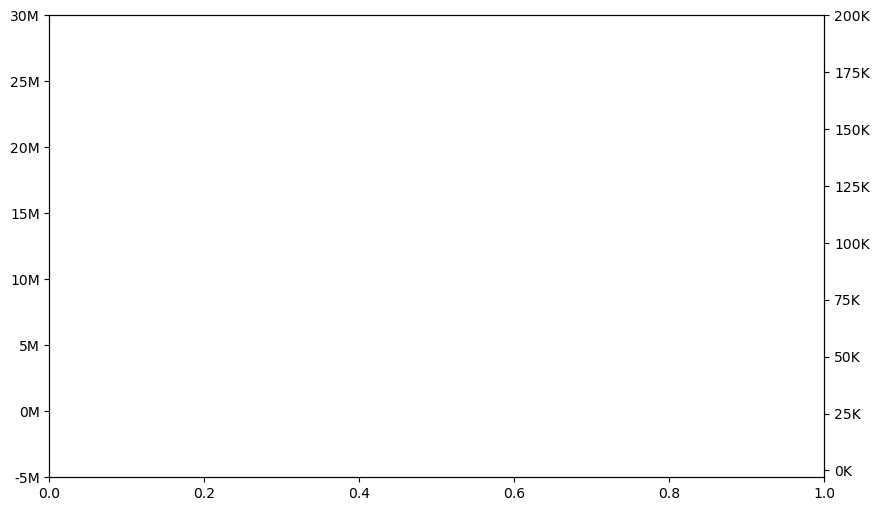

In [44]:
# Create graph for lines to go on
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  
#ax1.set_ylim(-2, 1)
ax2.set_ylim(-3000, 200000)
ax1.set_ylim(-5000000, 30000000)

ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(thousand)

In [45]:
# Plot Conclicts
ax2.plot(european_df.Year, european_df.total_conflict_deaths, label="Conflict Deaths", color="red")


In [46]:
# Plot Population
ax1.plot(european_df.Year, european_df.Population, label="Population")

In [47]:
# Plot Migration
ax1.plot(european_df.Year, european_df["Net migration"], label="Net migration")

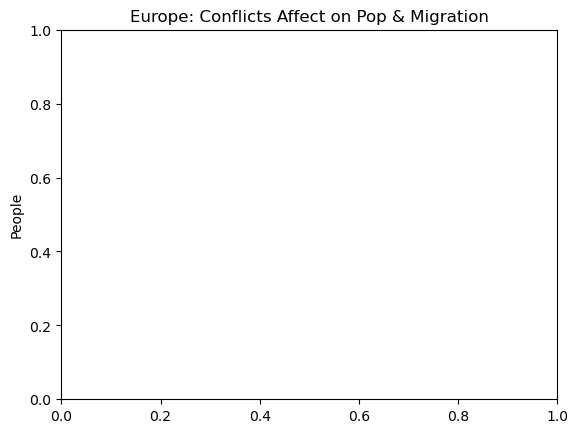

In [48]:
# Clean up Graph
ax1.set_xlabel("Year")
ax1.set_ylabel('People')
plt.ylabel('People')
plt.title('Europe: Conflicts Affect on Pop & Migration')
ax2.grid(True)
#ax1.grid(True)
ax1.legend(loc="upper left")
ax2.legend(loc="best")

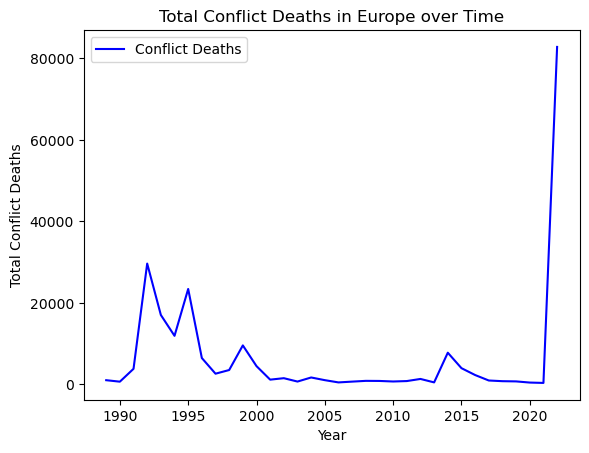

In [106]:
# Aggregate the total conflict deaths for each year
total_conflict_deaths_per_year = european_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year.index, total_conflict_deaths_per_year, label="Conflict Deaths", color="blue")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in Europe over Time")
plt.legend()
plt.show()

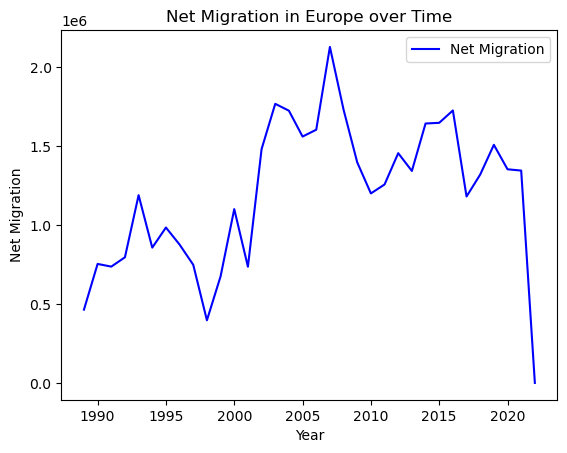

In [111]:
# Aggregate the net migration for each year
total_net_migration_per_year = european_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year.index, total_net_migration_per_year, label="Net Migration", color = "blue")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in Europe over Time")
plt.legend()
plt.show()

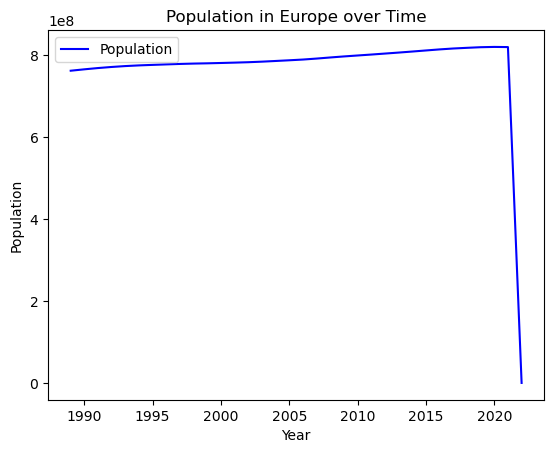

In [110]:
# Aggregate the population for each year
total_population_per_year = european_df.groupby('Year')['Population'].sum()

# Plot the aggregated data
plt.plot(total_population_per_year.index, total_population_per_year, label="Population", color = 'blue')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population in Europe over Time")
plt.legend()
plt.show()

In [52]:
# Merge the Middle East conflict and migration DataFrames on 'country_name' and 'year'
middle_east_df = pd.merge(middle_east_conflict_df, middle_east_migration_df, on=['Country name', 'Year'], how='outer')

# Merge the combined DataFrame with the Middle East population DataFrame on 'country_name' and 'year'
middle_east_df = pd.merge(middle_east_df, middle_east_population_df, on=['Country name', 'Year'], how='outer')

# Display the first few rows of the merged DataFrame
print(middle_east_df.head())

  Country name  Year  total_conflict_deaths  Net migration  Population
0  Afghanistan  1989                   5411         2683.0  10673172.0
1  Afghanistan  1990                   1514      -666001.0  10694804.0
2  Afghanistan  1991                   3553        39926.0  10745168.0
3  Afghanistan  1992                   4366      1834556.0  12057436.0
4  Afghanistan  1993                   4097      1171818.0  14003764.0


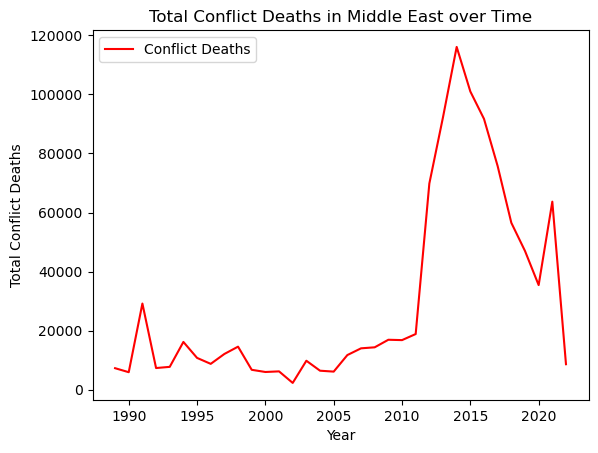

In [107]:
# Aggregate the total conflict deaths for each year in the Middle East DataFrame
total_conflict_deaths_per_year_middle_east = middle_east_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year_middle_east.index, total_conflict_deaths_per_year_middle_east, label="Conflict Deaths", color="red")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in Middle East over Time")
plt.legend()
plt.show()

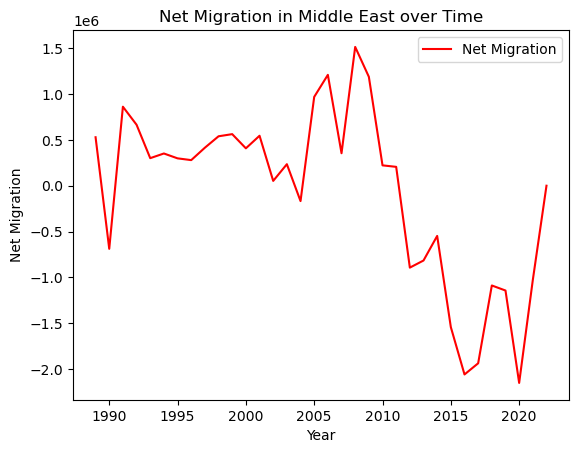

In [109]:
# Aggregate the net migration for each year in the Middle East DataFrame
total_net_migration_per_year_middle_east = middle_east_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_middle_east.index, total_net_migration_per_year_middle_east, label="Net Migration", color = 'red')
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in Middle East over Time")
plt.legend()
plt.show()

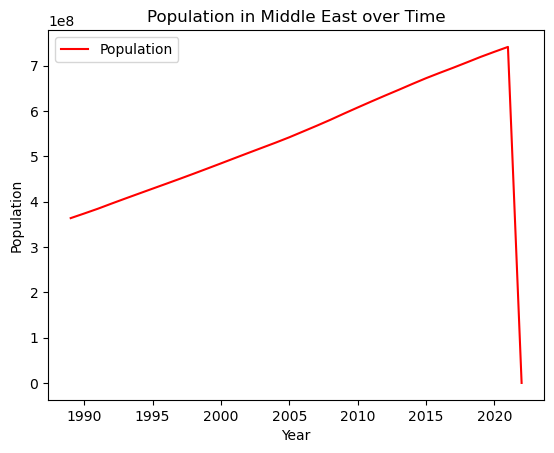

In [112]:
# Aggregate the population for each year in the Middle East DataFrame
total_population_per_year_middle_east = middle_east_df.groupby('Year')['Population'].sum()

# Plot the aggregated data
plt.plot(total_population_per_year_middle_east.index, total_population_per_year_middle_east, label="Population", color = "red")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population in Middle East over Time")
plt.legend()
plt.show()

In [56]:
# Merge 'africa_conflict_df' with 'africa_population_df' on the common column (e.g., 'Year' or 'Country')
african_df = pd.merge(african_conflict_df, african_population_df, on='Year', how='inner')

# Merge 'merged_df' with 'africa_migration_df' on the common column (e.g., 'Year' or 'Country')
african_df = pd.merge(african_df, african_migration_df, on='Year', how='inner')


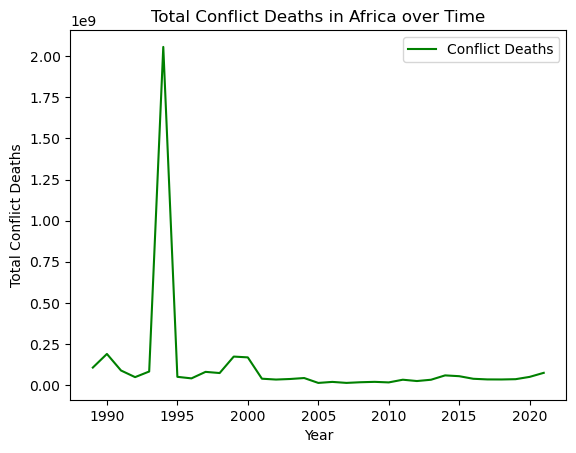

In [113]:
# Aggregate the total conflict deaths for each year in the Africa DataFrame
total_conflict_deaths_per_year_africa = african_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year_africa.index, total_conflict_deaths_per_year_africa, label="Conflict Deaths", color="green")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in Africa over Time")
plt.legend()
plt.show()

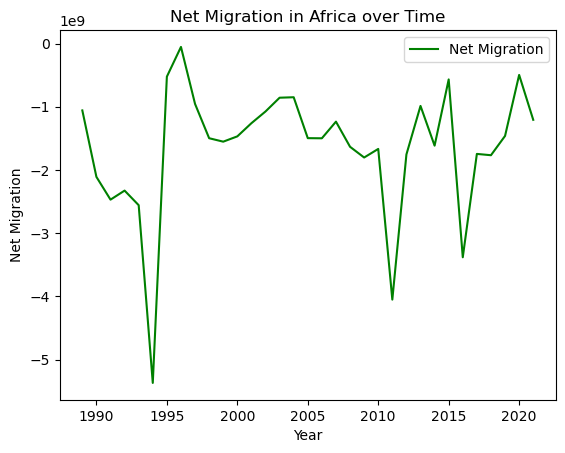

In [114]:
# Aggregate the net migration for each year in the Africa DataFrame
total_net_migration_per_year_africa = african_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_africa.index, total_net_migration_per_year_africa, label="Net Migration", color="green")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in Africa over Time")
plt.legend()
plt.show()

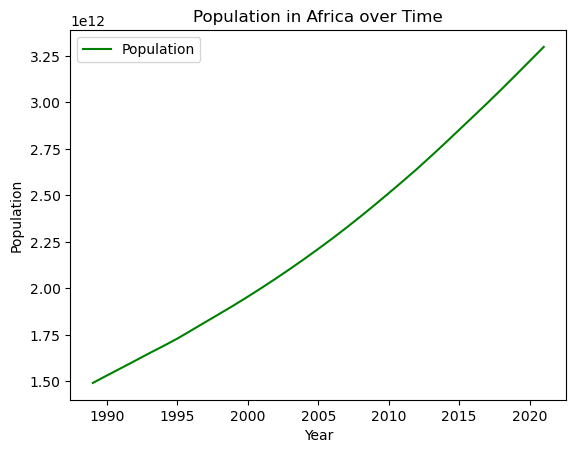

In [115]:
# Aggregate the population for each year in the Africa DataFrame
total_population_per_year_africa = african_df.groupby('Year')['Population'].sum()

# Plot the aggregated data
plt.plot(total_population_per_year_africa.index, total_population_per_year_africa, label="Population", color ='green')
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population in Africa over Time")
plt.legend()
plt.show()

In [62]:
# Merge 'south_america_conflict_df' with 'south_america_population_df' on the common column (e.g., 'Year' or 'Country')
south_america_df = pd.merge(south_american_conflict_df, south_american_population_df, on='Year', how='inner')

# Merge 'merged_df' with 'south_america_migration_df' on the common column (e.g., 'Year' or 'Country')
south_america_df = pd.merge(south_america_df, south_american_migration_df, on='Year', how='inner')


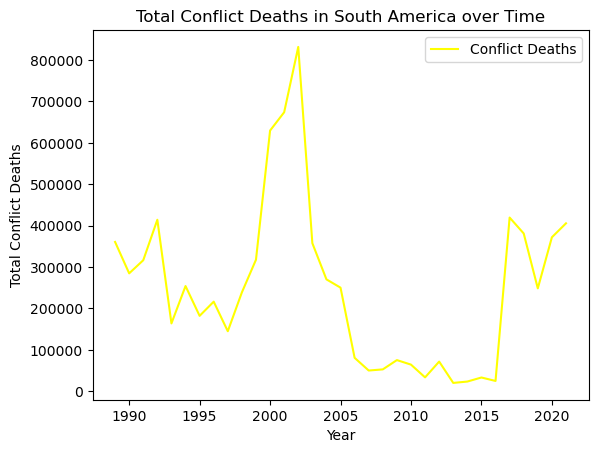

In [116]:
# Aggregate the total conflict deaths for each year in the South America DataFrame
total_conflict_deaths_per_year_south_america = south_america_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year_south_america.index, total_conflict_deaths_per_year_south_america, label="Conflict Deaths", color="yellow")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in South America over Time")
plt.legend()
plt.show()

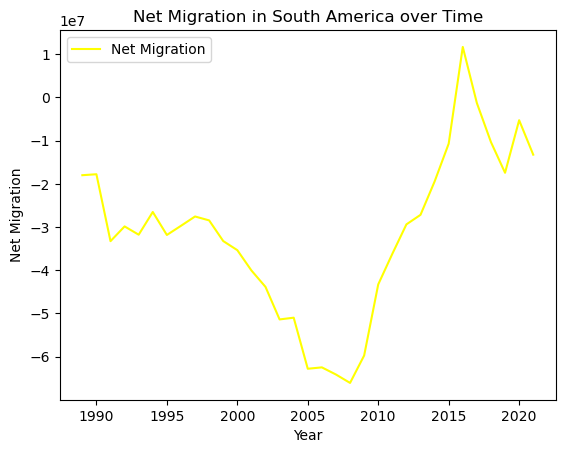

In [117]:
# Aggregate the net migration for each year in the South America DataFrame
total_net_migration_per_year_south_america = south_america_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_south_america.index, total_net_migration_per_year_south_america, label="Net Migration", color="yellow")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in South America over Time")
plt.legend()
plt.show()

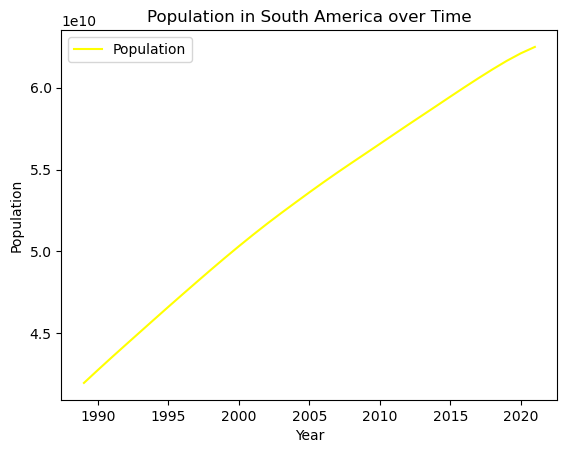

In [118]:
# Aggregate the population for each year in the South America DataFrame
total_population_per_year_south_america = south_america_df.groupby('Year')['Population'].sum()

# Plot the aggregated data
plt.plot(total_population_per_year_south_america.index, total_population_per_year_south_america, label="Population", color="yellow")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population in South America over Time")
plt.legend()
plt.show()

In [67]:
# Merge 'north_america_conflict_df' with 'north_america_population_df' on the common column (e.g., 'Year' or 'Country')
north_america_df = pd.merge(north_american_conflict_df, north_american_population_df, on='Year', how='inner')

# Merge 'merged_df' with 'south_america_migration_df' on the common column (e.g., 'Year' or 'Country')
north_america_df = pd.merge(north_america_df, north_american_migration_df, on='Year', how='inner')


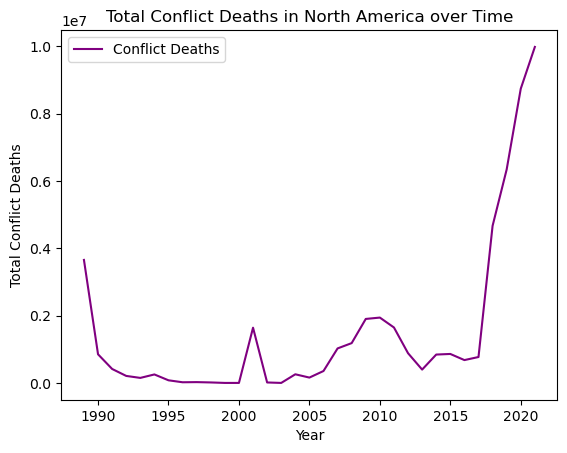

In [119]:
# Aggregate the total conflict deaths for each year in the North America DataFrame
total_conflict_deaths_per_year_north_america = north_america_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year_north_america.index, total_conflict_deaths_per_year_north_america, label="Conflict Deaths", color="purple")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in North America over Time")
plt.legend()
plt.show()

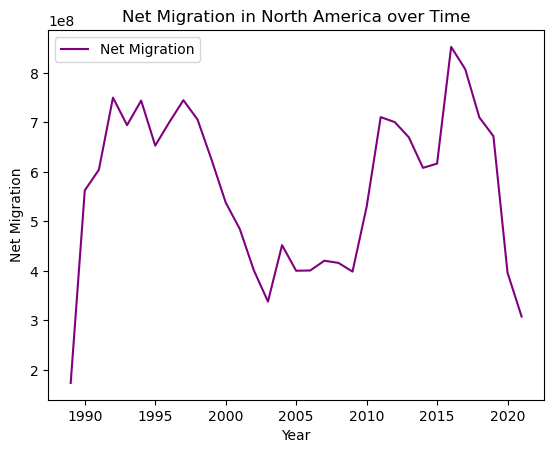

In [120]:
# Aggregate the net migration for each year in the North America DataFrame
total_net_migration_per_year_north_america = north_america_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_north_america.index, total_net_migration_per_year_north_america, label="Net Migration", color="purple")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in North America over Time")
plt.legend()
plt.show()

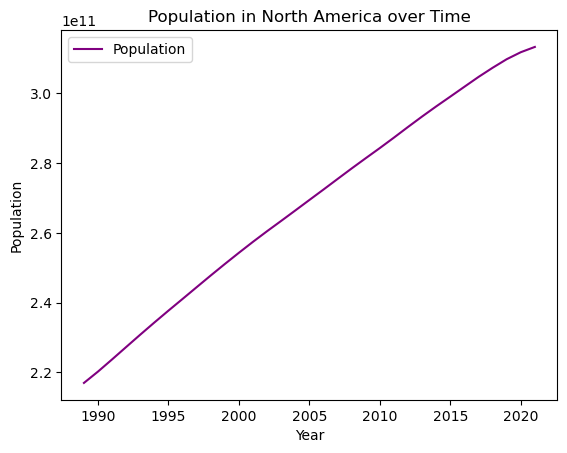

In [121]:
# Aggregate the population for each year in the North America DataFrame
total_population_per_year_north_america = north_america_df.groupby('Year')['Population'].sum()

# Plot the aggregated data
plt.plot(total_population_per_year_north_america.index, total_population_per_year_north_america, label="Population", color="purple")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population in North America over Time")
plt.legend()
plt.show()

In [71]:
# Merge 'central_america_conflict_df' with 'central_america_population_df' on the common column (e.g., 'Year' or 'Country')
central_america_df = pd.merge(central_american_conflict_df, central_american_population_df, on='Year', how='inner')

# Merge 'merged_df' with 'central_america_migration_df' on the common column (e.g., 'Year' or 'Country')
central_america_df = pd.merge(central_america_df, central_american_migration_df, on='Year', how='inner')


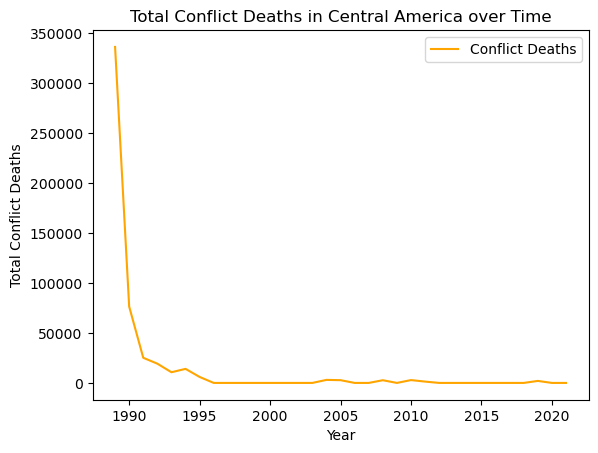

In [122]:
# Aggregate the total conflict deaths for each year in the Central America DataFrame
total_conflict_deaths_per_year_central_america = central_america_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year_central_america.index, total_conflict_deaths_per_year_central_america, label="Conflict Deaths", color="orange")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in Central America over Time")
plt.legend()
plt.show()

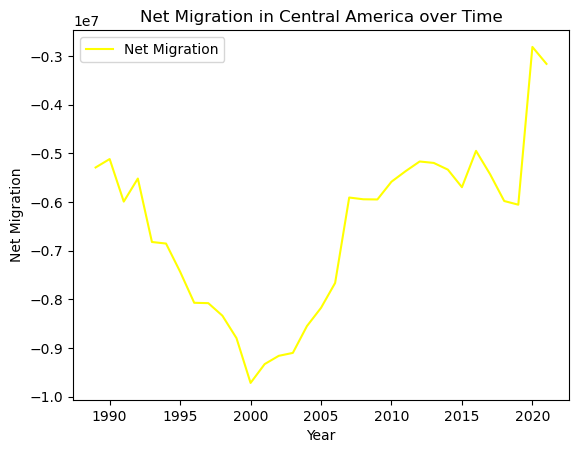

In [123]:
# Aggregate the net migration for each year in the Central America DataFrame
total_net_migration_per_year_central_america = central_america_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_central_america.index, total_net_migration_per_year_central_america, label="Net Migration", color="yellow")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in Central America over Time")
plt.legend()
plt.show()

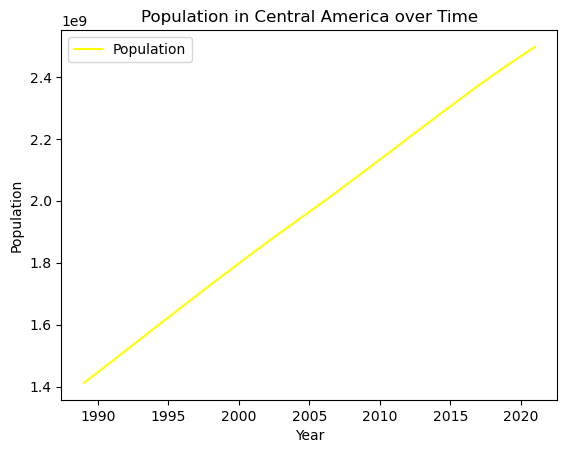

In [124]:
# Aggregate the population for each year in the Central America DataFrame
total_population_per_year_central_america = central_america_df.groupby('Year')['Population'].sum()

# Plot the aggregated data
plt.plot(total_population_per_year_central_america.index, total_population_per_year_central_america, label="Population", color="yellow")
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population in Central America over Time")
plt.legend()
plt.show()

In [76]:
# Merge 'asia_conflict_df' with 'central_america_population_df' on the common column (e.g., 'Year' or 'Country')
asia_df = pd.merge(asian_conflict_df, asian_population_df, on='Year', how='inner')

# Merge 'merged_df' with 'central_america_migration_df' on the common column (e.g., 'Year' or 'Country')
asia_df = pd.merge(asia_df, asian_migration_df, on='Year', how='inner')


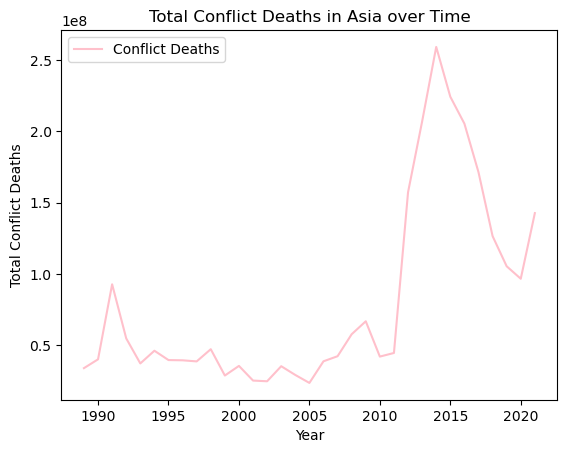

In [125]:
# Aggregate the total conflict deaths for each year in the Asia DataFrame
total_conflict_deaths_per_year_asia = asia_df.groupby('Year')['total_conflict_deaths'].sum()

# Plot the aggregated data
plt.plot(total_conflict_deaths_per_year_asia.index, total_conflict_deaths_per_year_asia, label="Conflict Deaths", color="pink")
plt.xlabel("Year")
plt.ylabel("Total Conflict Deaths")
plt.title("Total Conflict Deaths in Asia over Time")
plt.legend()
plt.show()

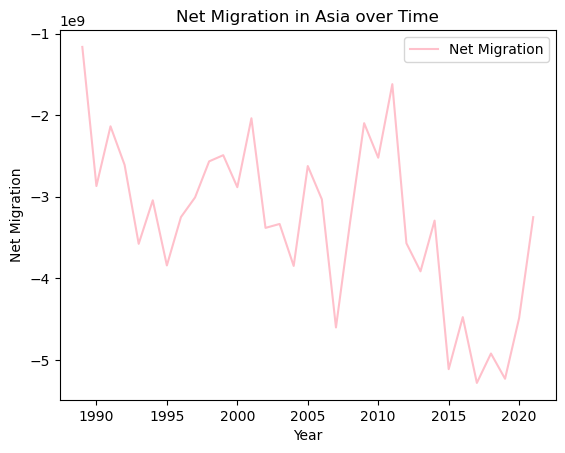

In [126]:
# Aggregate the net migration for each year in the Asia DataFrame
total_net_migration_per_year_asia = asia_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_asia.index, total_net_migration_per_year_asia, label="Net Migration", color="pink")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in Asia over Time")
plt.legend()
plt.show()

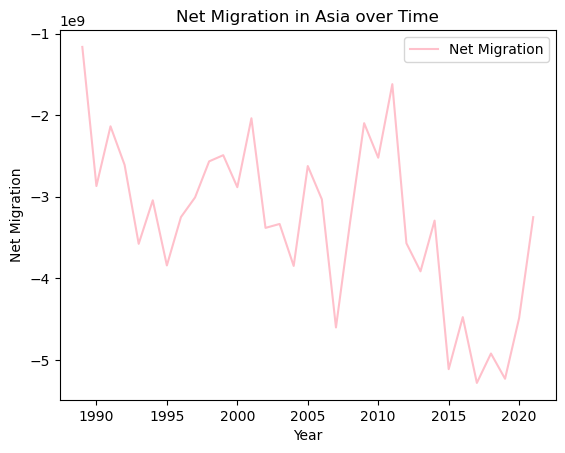

In [127]:
# Aggregate the net migration for each year in the Asia DataFrame
total_net_migration_per_year_asia = asia_df.groupby('Year')['Net migration'].sum()

# Plot the aggregated data
plt.plot(total_net_migration_per_year_asia.index, total_net_migration_per_year_asia, label="Net Migration", color="pink")
plt.xlabel("Year")
plt.ylabel("Net Migration")
plt.title("Net Migration in Asia over Time")
plt.legend()
plt.show()

In [82]:
# Compute the sum of total conflict deaths
conflict_deaths_in_europe = european_conflict_df['total_conflict_deaths'].sum()
conflict_deaths_in_asia = asian_conflict_df['total_conflict_deaths'].sum()
conflict_deaths_in_south_america = south_american_conflict_df['total_conflict_deaths'].sum()
conflict_deaths_in_north_america = north_american_conflict_df['total_conflict_deaths'].sum()
conflict_deaths_in_africa = african_conflict_df['total_conflict_deaths'].sum()



In [83]:
# Create a dictionary to store the sums
continent_deaths = {
    'Europe': conflict_deaths_in_europe,
    'Asia': conflict_deaths_in_asia,
    'South America': conflict_deaths_in_south_america,
    'North America': conflict_deaths_in_north_america,
    'Africa': conflict_deaths_in_africa
}

# Create a Series from the dictionary
total_deaths_series = pd.Series(continent_deaths, name='Total_Conflict_Deaths')

# Set the index name
total_deaths_series.index.name = 'Continent'

# Convert the series to a DataFrame
total_deaths_df = total_deaths_series.reset_index()

# Display the DataFrame
print(total_deaths_df)

       Continent  Total_Conflict_Deaths
0         Europe                 226305
1           Asia                1213600
2  South America                  59085
3  North America                 108961
4         Africa                1605480


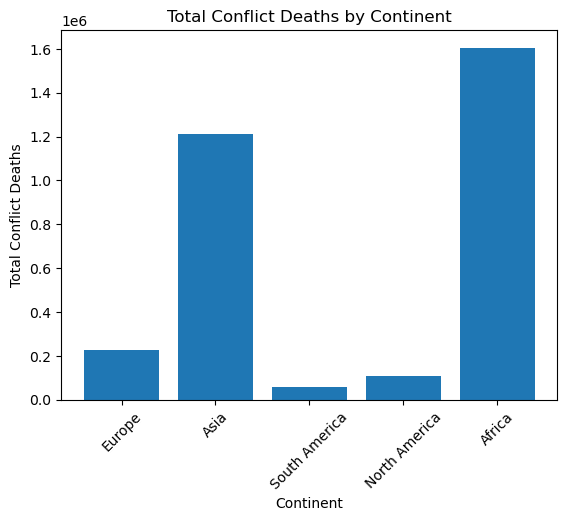

In [85]:
# Reset the index to make 'Continent' a regular column
total_deaths_df.reset_index(inplace=True)

# Plot the data
plt.bar(total_deaths_df['Continent'], total_deaths_df['Total_Conflict_Deaths'])

# Add labels and title
plt.xlabel('Continent')
plt.ylabel('Total Conflict Deaths')
plt.title('Total Conflict Deaths by Continent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [88]:
# Compute the sum of total migration for each continent
total_migration_in_europe = european_migration_df['Net migration'].sum()
total_migration_in_asia = asian_migration_df['Net migration'].sum()
total_migration_in_south_america = south_american_migration_df['Net migration'].sum()
total_migration_in_north_america = north_american_migration_df['Net migration'].sum()
total_migration_in_africa = african_migration_df['Net migration'].sum()

In [92]:
# Create a dictionary to store the sums of total migration for each continent
total_migration = {
    'Europe': total_migration_in_europe,
    'Asia': total_migration_in_asia,
    'South America': total_migration_in_south_america,
    'North America': total_migration_in_north_america,
    'Africa': total_migration_in_africa
}

# Create a DataFrame from the dictionary
total_migration_df = pd.DataFrame.from_dict(total_migration, orient='index', columns=['Total_Migration'])

# Rename the index name
total_migration_df.index.name = 'Continent'

# Display the DataFrame
print(total_migration_df)

               Total_Migration
Continent                     
Europe            4.067570e+07
Asia             -4.951665e+07
South America    -7.270746e+06
North America     3.551452e+07
Africa           -2.089625e+07


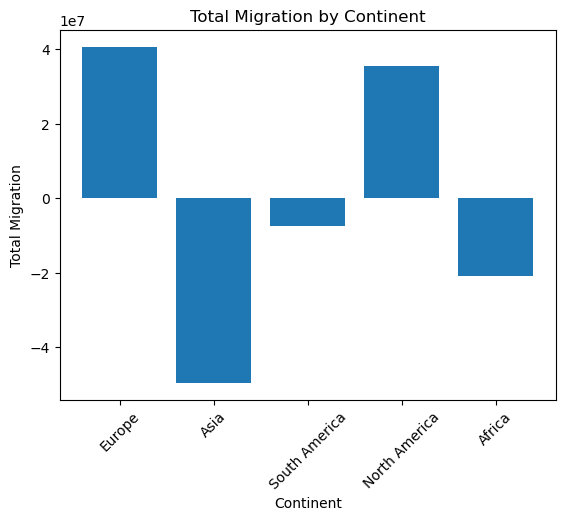

In [91]:
# Reset the index of the dictionary
total_migration_df = pd.DataFrame(list(total_migration.items()), columns=['Continent', 'Total_Migration'])

# Plot the data
plt.bar(total_migration_df['Continent'], total_migration_df['Total_Migration'])

# Add labels and title
plt.xlabel('Continent')
plt.ylabel('Total Migration')
plt.title('Total Migration by Continent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [93]:
# Compute the sum of total population for each continent
total_population_in_europe = european_population_df['Population'].sum()
total_population_in_asia = asian_population_df['Population'].sum()
total_population_in_south_america = south_american_population_df['Population'].sum()
total_population_in_north_america = north_american_population_df['Population'].sum()
total_population_in_africa = african_population_df['Population'].sum()

# Create a dictionary to store the sums of total population for each continent
total_population = {
    'Europe': total_population_in_europe,
    'Asia': total_population_in_asia,
    'South America': total_population_in_south_america,
    'North America': total_population_in_north_america,
    'Africa': total_population_in_africa
}

# Create a DataFrame from the dictionary
total_population_df = pd.DataFrame.from_dict(total_population, orient='index', columns=['Total_Population'])

# Rename the index name
total_population_df.index.name = 'Continent'

# Display the DataFrame
print(total_population_df)

               Total_Population
Continent                      
Europe              26141137977
Asia               129096187632
South America       12171576563
North America       16738978380
Africa              28946348637


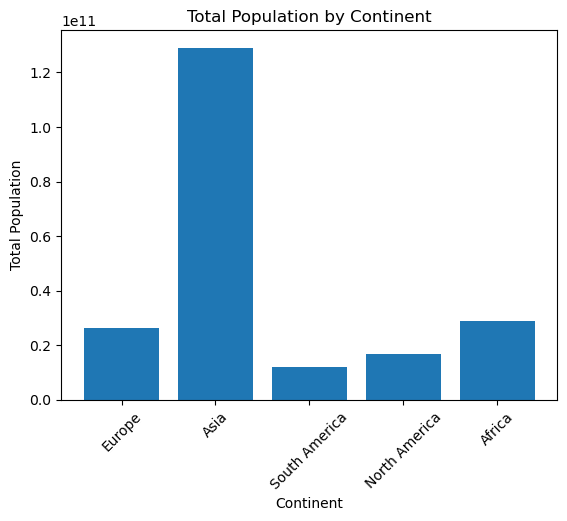

In [95]:
# Reset the index of the dictionary
total_population_df = pd.DataFrame(list(total_population.items()), columns=['Continent', 'Total_Population'])

# Plot the data
plt.bar(total_population_df['Continent'], total_population_df['Total_Population'])

# Add labels and title
plt.xlabel('Continent')
plt.ylabel('Total Population')
plt.title('Total Population by Continent')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [102]:
# Compute the correlation matrix
correlation_matrix = european_df[['Population', 'Net migration', 'total_conflict_deaths']].corr()

# Extract the correlation coefficient between total population, total migration, and total conflict deaths
correlation_population_migration = correlation_matrix.loc['Population', 'Net migration']
correlation_population_conflict = correlation_matrix.loc['Population', 'total_conflict_deaths']
correlation_migration_conflict = correlation_matrix.loc['Net migration', 'total_conflict_deaths']

# Display the correlation coefficients
print("Correlation between Total Population and Total Migration:", correlation_population_migration)
print("Correlation between Total Population and Total Conflict Deaths:", correlation_population_conflict)
print("Correlation between Total Migration and Total Conflict Deaths:", correlation_migration_conflict)

Correlation between Total Population and Total Migration: 0.620885318955534
Correlation between Total Population and Total Conflict Deaths: 0.09697273588584311
Correlation between Total Migration and Total Conflict Deaths: -0.040970216613160665
